In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"z2a1fx","key":"7b5b7e952f4381961a7c333f14290c89"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 95% 408M/428M [00:01<00:00, 227MB/s]
100% 428M/428M [00:01<00:00, 232MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip


Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import pandas as pd  #audio process korar jonno
import numpy as np
import os  #deal with file
import seaborn as sns  #visualization ar jonno
import matplotlib.pyplot as plt #visualization ar jonno
import librosa #audio library file
import librosa.display #audio library file
from IPython.display import Audio #to play audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
paths = []
labels = []
for dirname,_, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())


In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,fear
1,/content/TESS Toronto emotional speech set dat...,fear
2,/content/TESS Toronto emotional speech set dat...,fear
3,/content/TESS Toronto emotional speech set dat...,fear
4,/content/TESS Toronto emotional speech set dat...,fear


In [ ]:
df['label'].value_counts()

label
fear       400
neutral    400
sad        400
disgust    400
angry      400
ps         400
happy      400
Name: count, dtype: int64

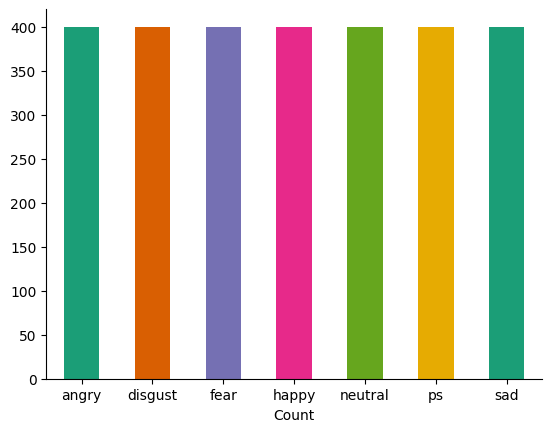

In [ ]:
ax = df.groupby('label').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.grid(axis='x', linestyle='', alpha=0.6)
ax.spines[['right', 'top']].set_visible(False)
plt.xlabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
#waveform of data ar jonno
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()




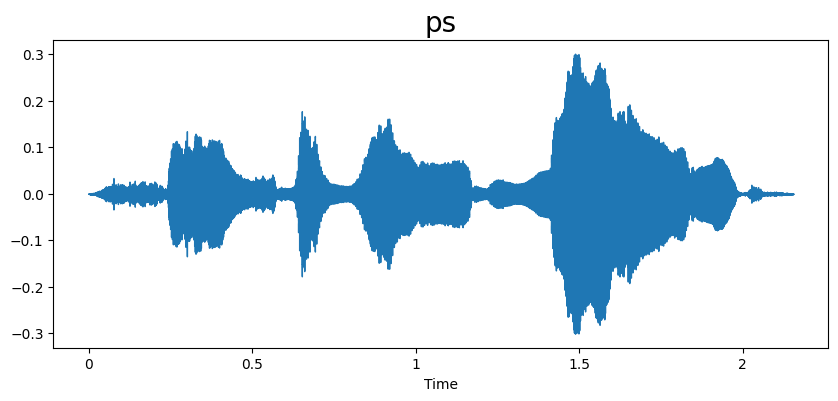

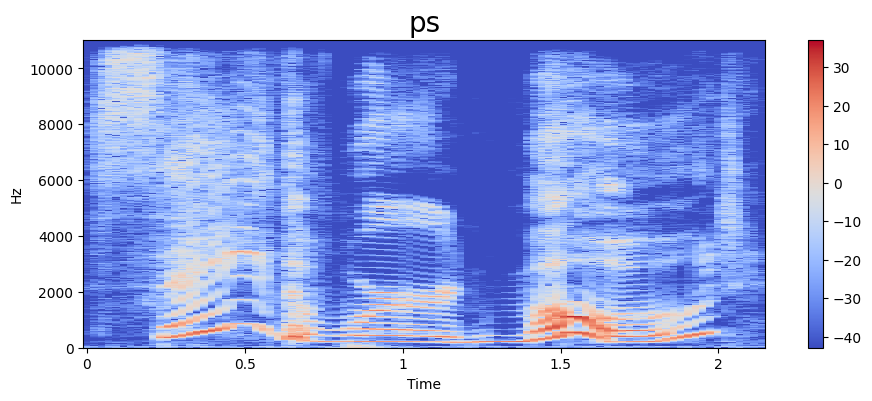

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)



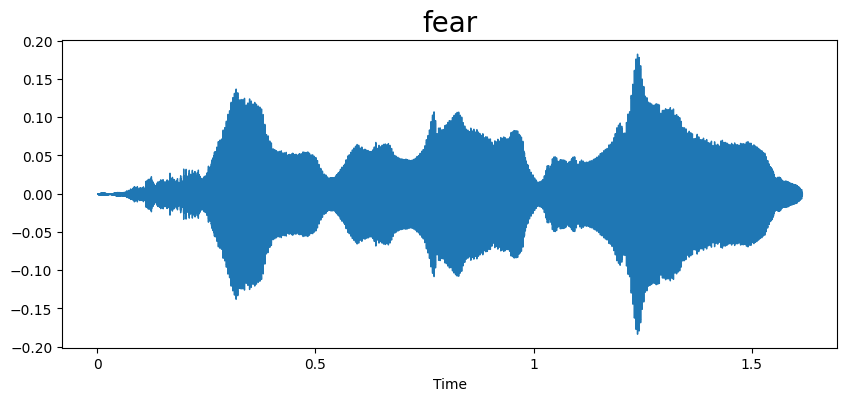

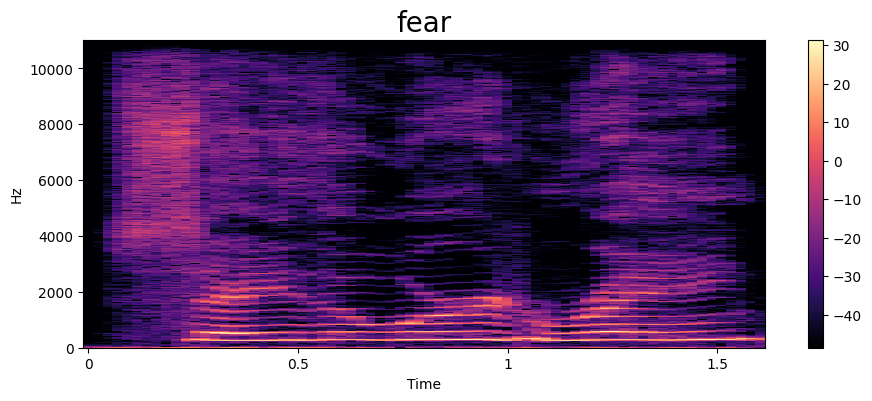

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

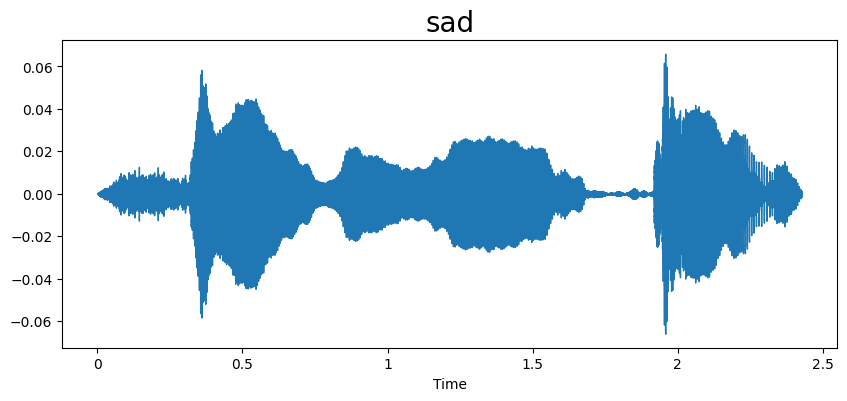

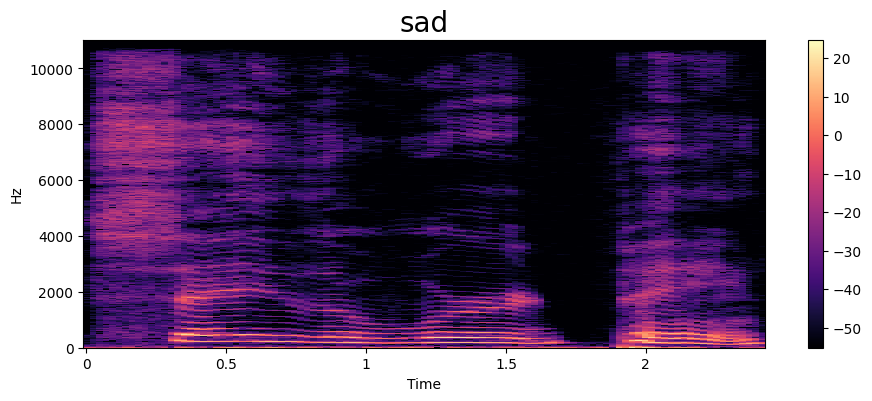

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

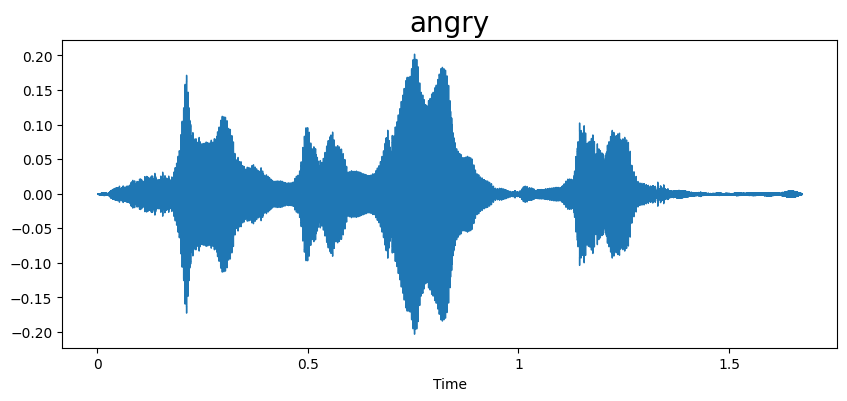

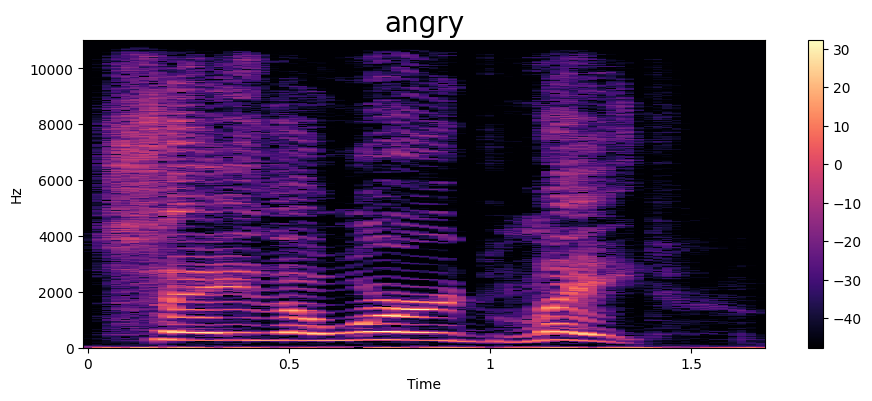

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

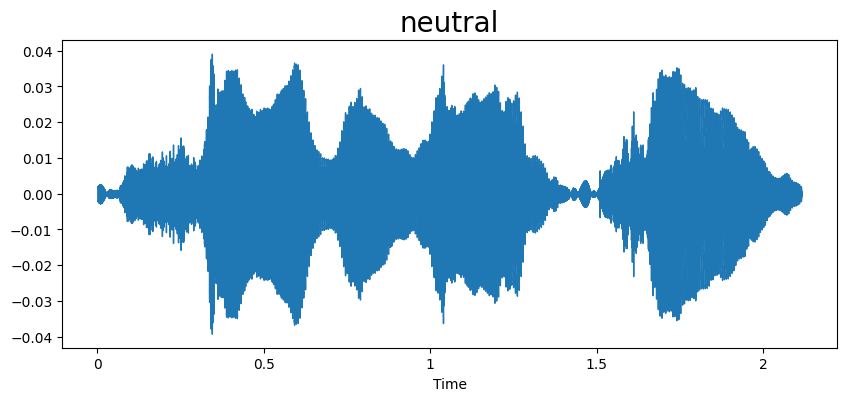

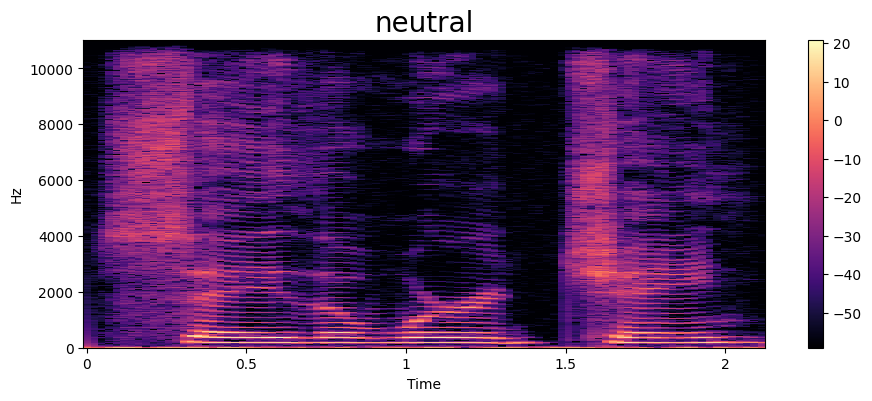

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

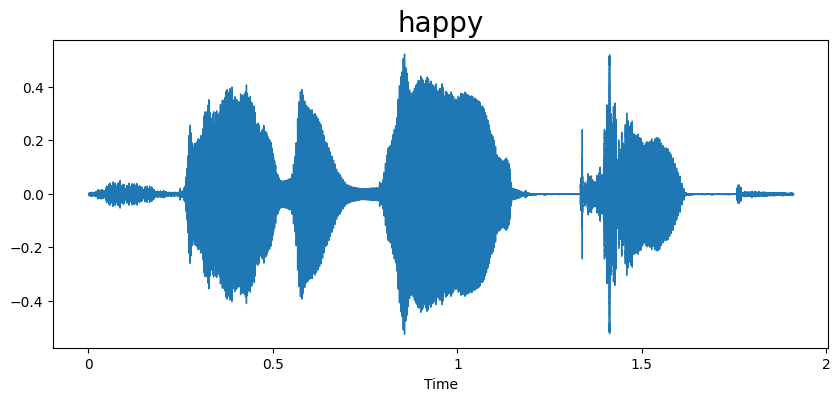

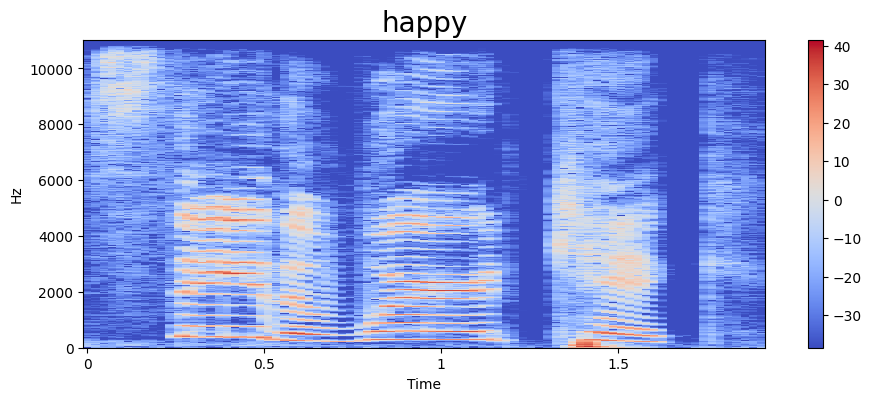

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

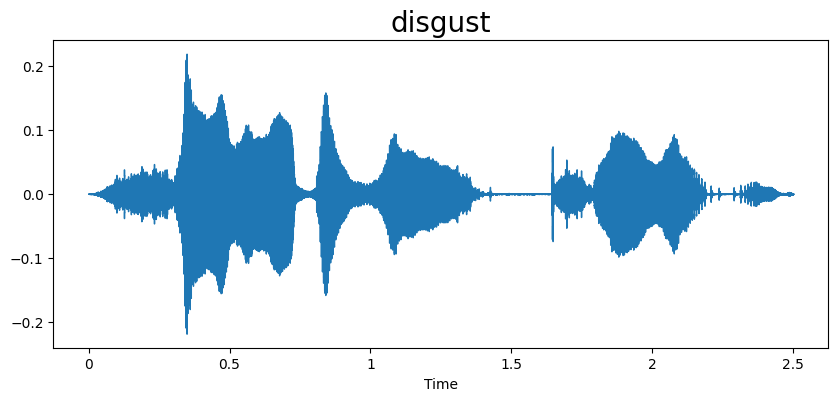

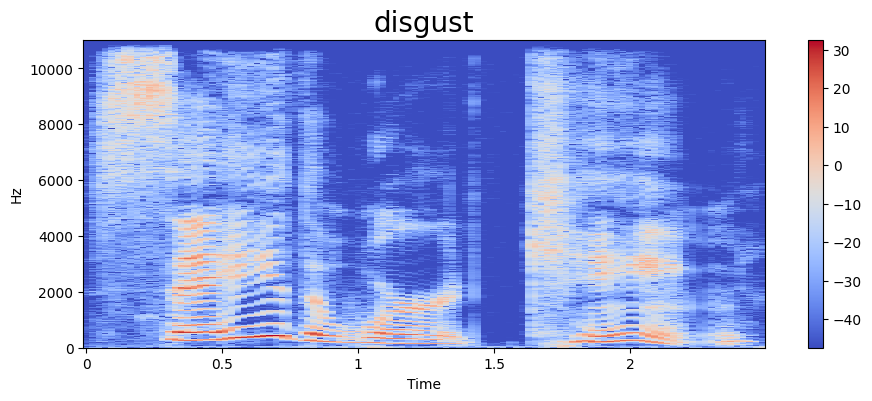

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

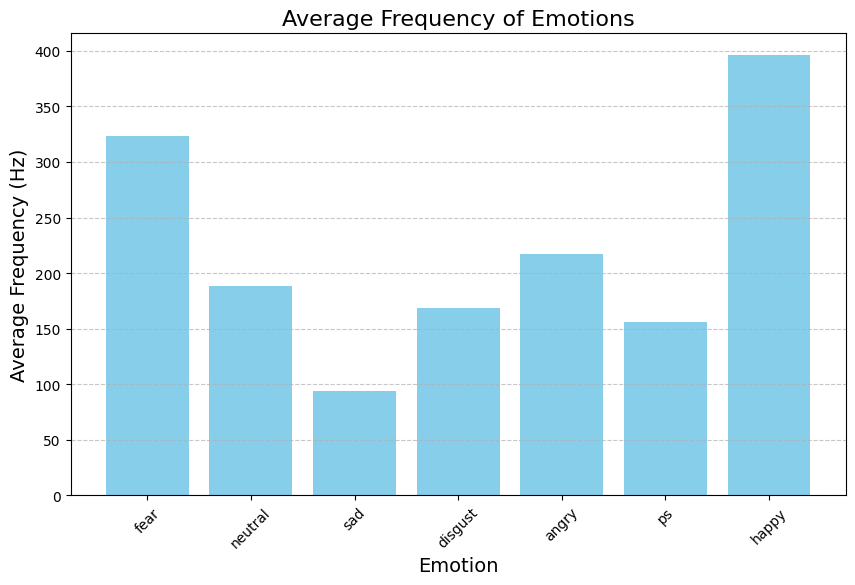

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def average_frequency(data, sr):
    frequencies = []
    for d in data:

        x = librosa.stft(d)
        xdb = librosa.amplitude_to_db(abs(x))

        max_freq_index = np.argmax(np.mean(xdb, axis=1))

        max_freq_hz = librosa.fft_frequencies(sr=sr)[max_freq_index]
        frequencies.append(max_freq_hz)

    return np.mean(frequencies)

emotions = df['label'].unique()

average_freqs = []
for emotion in emotions:
    paths = np.array(df['speech'][df['label'] == emotion])
    data = [librosa.load(path)[0] for path in paths]
    sampling_rate = librosa.load(paths[0])[1]
    avg_frequency = average_frequency(data, sampling_rate)
    average_freqs.append(avg_frequency)


plt.figure(figsize=(10, 6))
plt.bar(emotions, average_freqs, color='skyblue')
plt.title('Average Frequency of Emotions', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Average Frequency (Hz)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#extraction mfcc part of preprocess
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=60).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.3111783e+02,  9.4585228e+01,  1.9681349e+01, -2.1290964e+01,
       -2.1226628e+00,  3.6213920e+00, -1.7508070e+01,  4.6717107e-01,
       -1.8993202e+01, -1.4924142e+01, -1.8927423e+01, -1.3780700e+01,
       -1.2192947e+01,  1.0564023e-01, -1.2925957e+01,  3.0550008e+00,
       -5.8838501e+00, -2.8350800e-01,  2.3058197e+00, -9.1802416e+00,
       -4.5326033e+00,  1.0713325e+01,  1.4921860e+01,  3.3661427e+01,
        3.5672371e+01,  3.7309811e+01,  1.7311264e+01,  8.7671900e+00,
       -6.0109982e+00,  3.4943080e-01,  2.0835631e+00,  2.6119368e+00,
        1.0791931e+00, -9.8899975e+00, -4.2273512e+00,  5.4839191e+00,
       -1.8039043e+00, -1.7413536e-01, -9.4527655e+00, -2.8168485e+00,
        2.4486606e+00, -2.3571217e+00, -4.0486670e+00, -2.7097008e+00,
       -1.1305076e+00,  8.7045765e+00,  3.9720824e+00,  1.1224366e+01,
        1.2360271e+01,  1.4656950e+01,  5.4878073e+00,  2.7593799e+00,
        3.7020204e+00,  4.8163972e+00,  1.1888959e+00,  9.8334885e-01,
      

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-431.11783, 94.58523, 19.681349, -21.290964, ...
1       [-488.8186, 62.077576, 19.631454, 8.904011, 14...
2       [-458.90762, 61.858913, 6.6702766, -8.0293, -4...
3       [-447.03625, 97.54478, 17.762833, -13.757615, ...
4       [-434.17682, 73.735596, 10.707185, -8.676917, ...
                              ...                        
2795    [-403.4053, 95.46842, -1.1253117, -6.45312, 4....
2796    [-441.7221, 99.17337, 7.677656, 6.856741, 8.61...
2797    [-425.4949, 112.23471, 30.874598, -4.681881, -...
2798    [-494.01007, 119.19738, -7.1911592, -12.274147...
2799    [-453.744, 61.561485, 3.7196603, 15.247067, 17...
Name: speech, Length: 2800, dtype: object

In [ ]:
import pandas as pd

X_mfcc_df = pd.DataFrame(X_mfcc.tolist())

output_csv_path = 'mfcc_features.csv'
X_mfcc_df.to_csv(output_csv_path, index=False)


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape
#no of sample and no of feature

(2800, 60)

In [ ]:
# input split

X = np.expand_dims(X, -1)
X.shape

(2800, 60, 1)

In [ ]:
#output column


from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
y.shape #output

(2800, 7)

In [ ]:
import pandas as pd


y_df = pd.DataFrame(y)

output_csv_path = 'one_hot_encoded_labels.csv'
y_df.to_csv(output_csv_path, index=False)


LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(60,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 5s 31ms/step - loss: 1.3081 - accuracy: 0.4777 - val_loss: 2.6859 - val_accuracy: 0.1982
Epoch 2/50
35/35 [==============================] - 0s 10ms/step - loss: 0.6182 - accuracy: 0.7670 - val_loss: 4.7026 - val_accuracy: 0.2268
Epoch 3/50
35/35 [==============================] - 0s 9ms/step - loss: 0.3317 - accuracy: 0.8839 - val_loss: 3.7887 - val_accuracy: 0.2893
Epoch 4/50
35/35 [==============================] - 1s 20ms/step - loss: 0.2001 - accuracy: 0.9357 - val_loss: 5.1414 - val_accuracy: 0.2429
Epoch 5/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1934 - accuracy: 0.9424 - val_loss: 5.3272 - val_accuracy: 0.2732
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1547 - accuracy: 0.9594 - val_loss: 5.8756 - val_accuracy: 0.2786
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1877 - accuracy: 0.9500 - val_loss: 4.6436 - val_accuracy: 0.2804
Epoch 8/50
35/35 

In [ ]:
#value accuracy
val_acc = history.history['val_accuracy']
average_val_acc = sum(val_acc) / len(val_acc)
print(f"Average Validation Accuracy: {average_val_acc}")

Average Validation Accuracy: 0.2750000008940697


In [ ]:
#model theke accuracy
acc = history.history['accuracy']
average_acc = sum(acc) / len(acc)
print(f"Average Validation Accuracy: {average_acc}")

Average Validation Accuracy: 0.9679732149839402


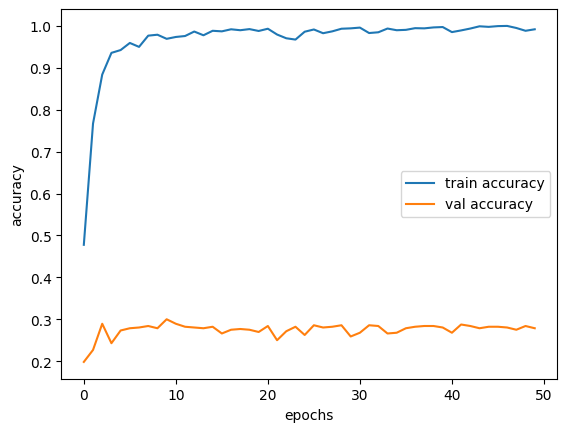

In [ ]:
#plot result
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


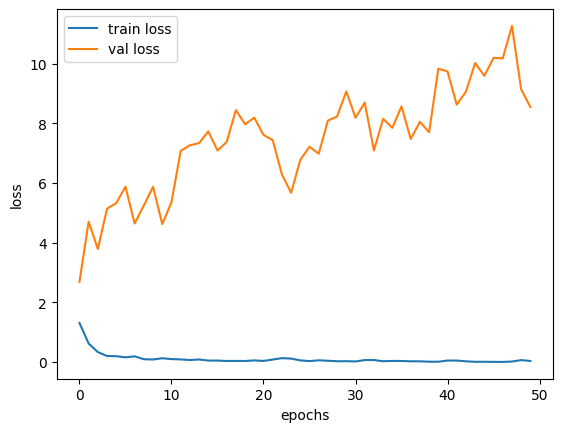

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

88/88 [==============================] - 1s 4ms/step
Emotion: angry
Precision: 0.9827160493827161
Recall: 0.995

Emotion: disgust
Precision: 0.9950248756218906
Recall: 0.5

Emotion: fear
Precision: 1.0
Recall: 0.98

Emotion: happy
Precision: 0.5702005730659025
Recall: 0.995

Emotion: neutral
Precision: 0.9975062344139651
Recall: 1.0

Emotion: ps
Precision: 0.9900497512437811
Recall: 0.4975

Emotion: sad
Precision: 0.7928286852589641
Recall: 0.995



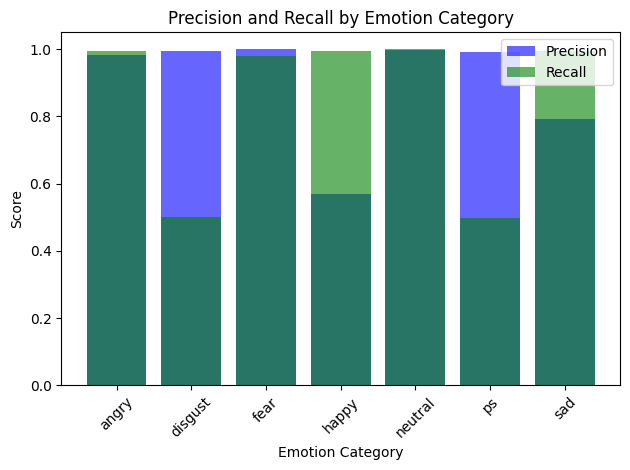

In [ ]:

y_pred = model.predict(X)

y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y, axis=1)
from sklearn.metrics import precision_score, recall_score, classification_report

precision = precision_score(y_true_labels, y_pred_labels, average=None)
recall = recall_score(y_true_labels, y_pred_labels, average=None)


class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
classification_rep = classification_report(y_true_labels, y_pred_labels, target_names=class_names)
for i, emotion in enumerate(class_names):
    print(f"Emotion: {emotion}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}\n")
plt.bar(range(len(class_names)), precision, color='blue', alpha=0.6, label='Precision')
plt.bar(range(len(class_names)), recall, color='green', alpha=0.6, label='Recall')
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.xlabel('Emotion Category')
plt.ylabel('Score')
plt.title('Precision and Recall by Emotion Category')
plt.legend()
plt.tight_layout()
plt.show()


18/18 [==============================] - 0s 4ms/step


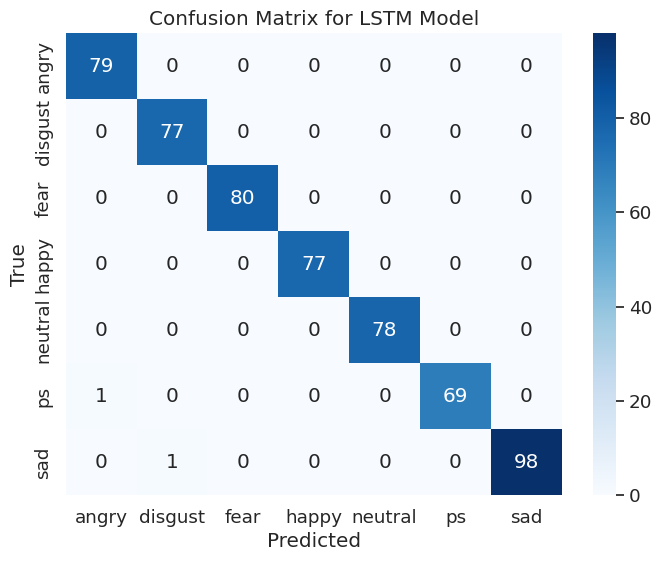

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels,
            yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for LSTM Model')
plt.show()


RFC

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_rf = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X_rf, np.argmax(y, axis=1), test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(y_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy}")


[6 1 3 6 3 4 0 5 2 6 1 1 3 6 3 6 1 5 4 6 0 5 6 0 1 6 1 0 5 0 0 6 5 1 3 6 4
 0 5 5 3 5 3 4 5 6 5 2 0 1 4 0 0 6 6 6 3 2 3 4 6 0 5 2 1 2 5 4 0 3 6 6 4 1
 5 5 2 5 1 2 1 2 5 0 5 0 4 4 5 6 4 1 6 2 5 5 0 6 6 3 3 0 1 1 0 1 0 3 1 5 0
 0 2 2 1 6 5 2 6 6 3 5 2 5 3 0 2 0 1 1 6 6 4 1 1 2 3 2 6 0 2 6 2 2 2 0 2 2
 0 3 5 6 2 0 1 1 5 1 3 4 0 6 2 4 4 4 0 5 2 1 5 4 4 6 4 3 2 2 1 2 0 6 2 3 0
 5 5 4 2 4 6 5 4 0 6 1 0 2 6 1 6 6 6 5 1 5 3 6 3 2 2 5 3 0 6 2 3 5 0 0 5 4
 3 0 3 0 5 1 6 6 0 0 2 6 3 4 6 3 3 1 0 0 5 3 4 5 4 0 0 2 3 6 3 3 6 4 6 1 6
 0 6 2 4 5 1 6 4 0 6 5 3 4 2 6 1 5 2 5 0 0 2 1 0 2 2 4 2 2 6 2 4 1 6 2 0 4
 2 2 2 4 2 5 3 3 2 2 6 1 0 2 4 2 3 5 6 4 4 4 0 3 2 3 3 6 0 1 6 3 2 2 6 4 6
 6 1 0 3 6 1 1 4 3 1 6 1 4 6 3 4 2 0 2 0 4 5 1 6 2 4 3 5 1 0 0 5 0 6 6 1 0
 1 5 4 3 3 4 0 0 2 3 4 3 2 2 3 5 6 4 0 5 3 0 4 6 4 6 2 3 1 4 4 2 6 4 4 1 3
 1 1 5 5 0 1 3 6 1 0 5 2 3 2 3 5 6 6 2 6 1 4 4 2 6 2 2 5 3 5 3 4 6 5 6 5 4
 5 5 1 6 1 1 1 0 4 3 3 2 6 1 4 3 6 6 6 6 1 4 6 6 3 4 0 6 0 1 5 6 1 6 1 0 2
 5 3 4 5 0 1 3 4 1 4 5 4 

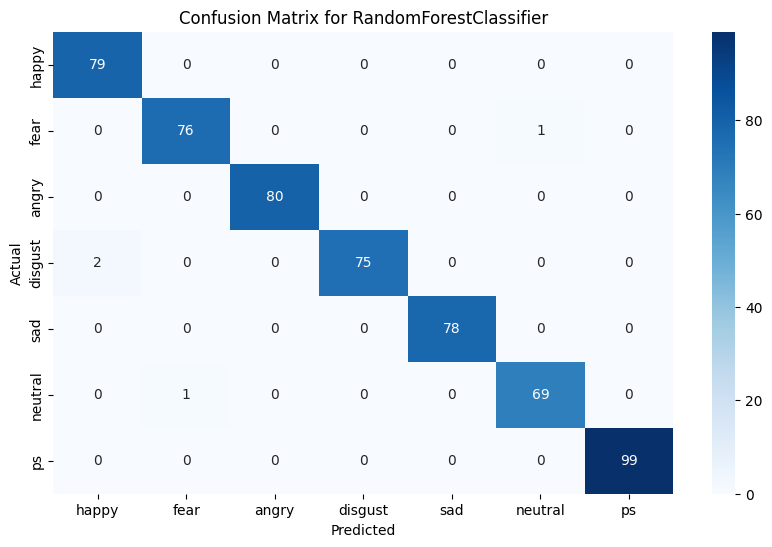

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

emotion_labels = ["happy", "fear", "angry", "disgust", "sad", "neutral", "ps"]

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title('Confusion Matrix for RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

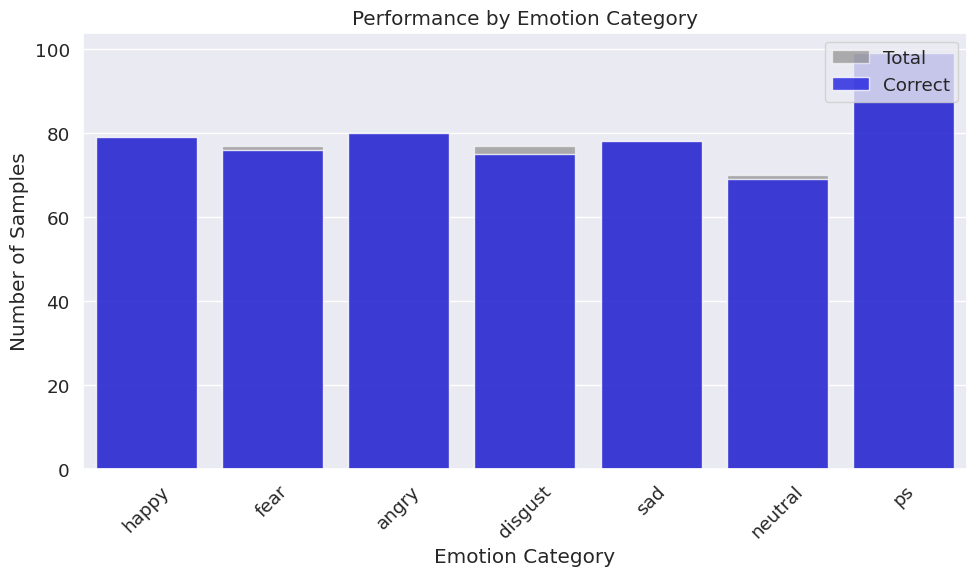

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_matrix = confusion_matrix(y_test, y_pred)

emotion_labels = ["happy", "fear", "angry", "disgust", "sad", "neutral", "ps"]
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.barplot(x=emotion_labels, y=conf_matrix.sum(axis=1), color='gray', label='Total', alpha=0.6)
sns.barplot(x=emotion_labels, y=conf_matrix.diagonal(), color='blue', label='Correct', alpha=0.8)

plt.title('Performance by Emotion Category')
plt.xlabel('Emotion Category')
plt.ylabel('Number of Samples')
plt.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Emotion: happy
Precision: 0.9753
Recall: 1.0000
Emotion: fear
Precision: 0.9870
Recall: 0.9870
Emotion: angry
Precision: 1.0000
Recall: 1.0000
Emotion: disgust
Precision: 1.0000
Recall: 0.9740
Emotion: sad
Precision: 1.0000
Recall: 1.0000
Emotion: neutral
Precision: 0.9857
Recall: 0.9857
Emotion: ps
Precision: 1.0000
Recall: 1.0000


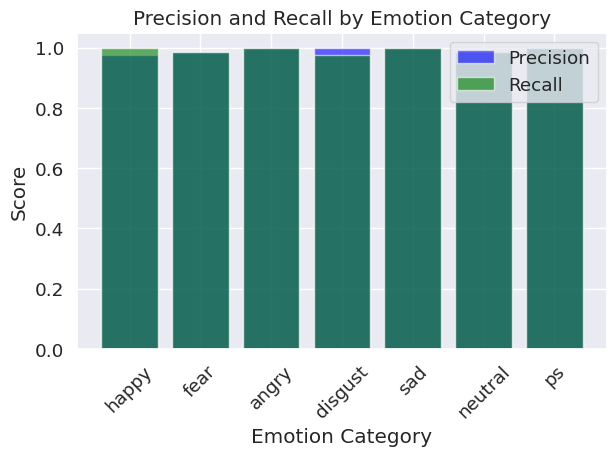

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_scores = precision_score(y_test, y_pred, average=None)
recall_scores = recall_score(y_test, y_pred, average=None)
for emotion, precision, recall in zip(emotion_labels, precision_scores, recall_scores):
    print(f"Emotion: {emotion}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("="*30)
plt.bar(range(len(emotion_labels)), precision_scores, color='blue', alpha=0.6, label='Precision')
plt.bar(range(len(emotion_labels)), recall_scores, color='green', alpha=0.6, label='Recall')
plt.xticks(range(len(emotion_labels)), emotion_labels, rotation=45)
plt.xlabel('Emotion Category')
plt.ylabel('Score')
plt.title('Precision and Recall by Emotion Category')
plt.legend()
plt.tight_layout()
plt.show()


CNN 1D

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=60).T, axis=0)
    return mfcc

df['mfcc'] = df['speech'].apply(lambda x: extract_mfcc(x))

X = np.array(df['mfcc'].tolist())
X = np.expand_dims(X, axis=-1)
y = enc.fit_transform(df[['label']]).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(60, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 29, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 27, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 13, 128)           0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 1664)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [ ]:

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
28/28 [==============================] - 3s 11ms/step - loss: 1.8546 - accuracy: 0.5882 - val_loss: 0.2835 - val_accuracy: 0.9085
Epoch 2/50
28/28 [==============================] - 0s 5ms/step - loss: 0.2017 - accuracy: 0.9369 - val_loss: 0.1231 - val_accuracy: 0.9665
Epoch 3/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0956 - accuracy: 0.9732 - val_loss: 0.0767 - val_accuracy: 0.9754
Epoch 4/50
28/28 [==============================] - 0s 6ms/step - loss: 0.0597 - accuracy: 0.9860 - val_loss: 0.0459 - val_accuracy: 0.9888
Epoch 5/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0427 - accuracy: 0.9877 - val_loss: 0.0486 - val_accuracy: 0.9866
Epoch 6/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0301 - accuracy: 0.9927 - val_loss: 0.0370 - val_accuracy: 0.9911
Epoch 7/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0300 - accuracy: 0.9911 - val_loss: 0.0598 - val_accuracy: 0.9754
Epoch 8/50
28/28 [=

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

18/18 [==============================] - 0s 8ms/step - loss: 0.0073 - accuracy: 0.9964
Test Accuracy: 99.64%


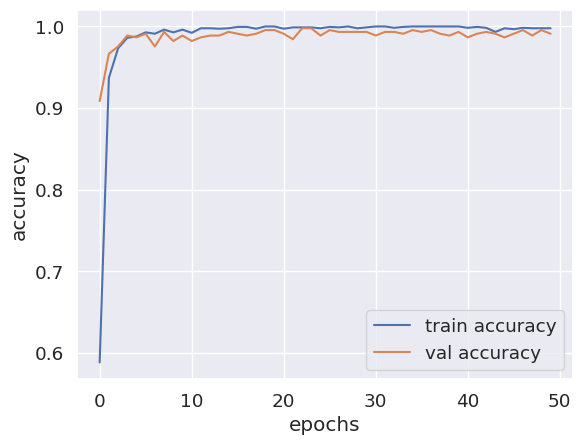

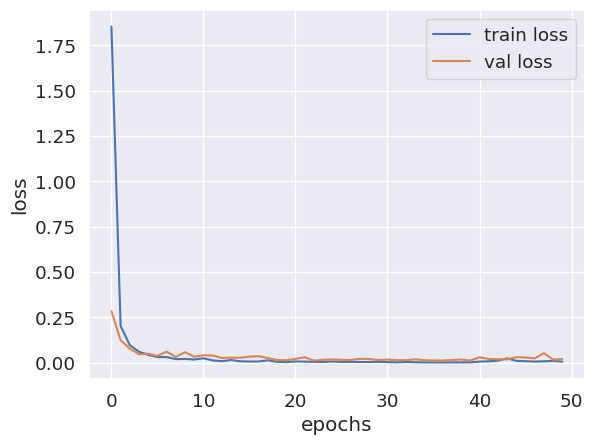

In [ ]:

epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

18/18 [==============================] - 0s 2ms/step


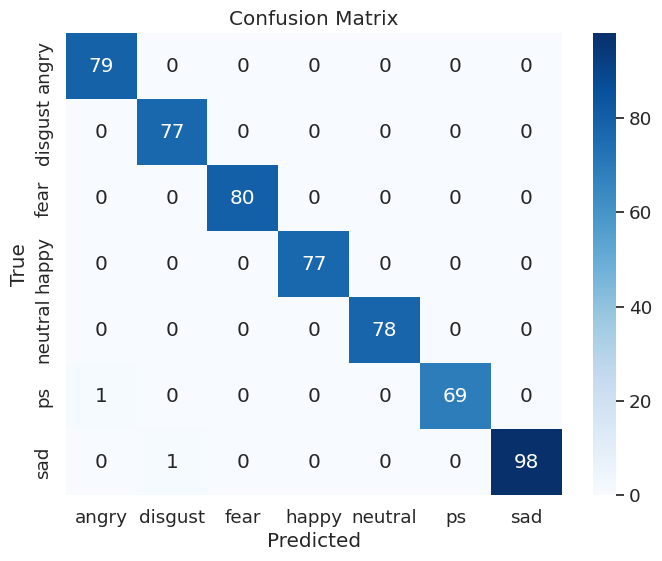

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad'],
            yticklabels=['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


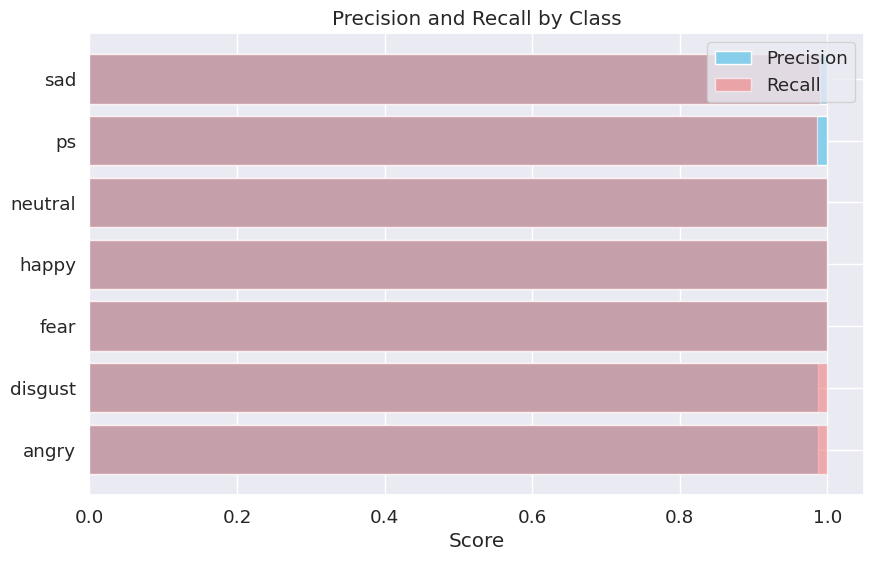

Emotion: happy
Precision: 0.9753
Recall: 1.0000
Emotion: fear
Precision: 0.9870
Recall: 0.9870
Emotion: angry
Precision: 1.0000
Recall: 1.0000
Emotion: disgust
Precision: 1.0000
Recall: 0.9740
Emotion: sad
Precision: 1.0000
Recall: 1.0000
Emotion: neutral
Precision: 0.9857
Recall: 0.9857
Emotion: ps
Precision: 1.0000
Recall: 1.0000


In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']

report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)


precision = [report[class_name]['precision'] for class_name in class_names]
recall = [report[class_name]['recall'] for class_name in class_names]

plt.figure(figsize=(10, 6))
plt.barh(class_names, precision, color='skyblue', label='Precision')
plt.barh(class_names, recall, color='lightcoral', alpha=0.6, label='Recall')
plt.xlabel('Score')
plt.title('Precision and Recall by Class')
plt.legend(loc='upper right')
plt.show()
for emotion, precision, recall in zip(emotion_labels, precision_scores, recall_scores):
    print(f"Emotion: {emotion}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("="*30)

0.9679732149839402
0.9928571428571429
0.9964285492897034


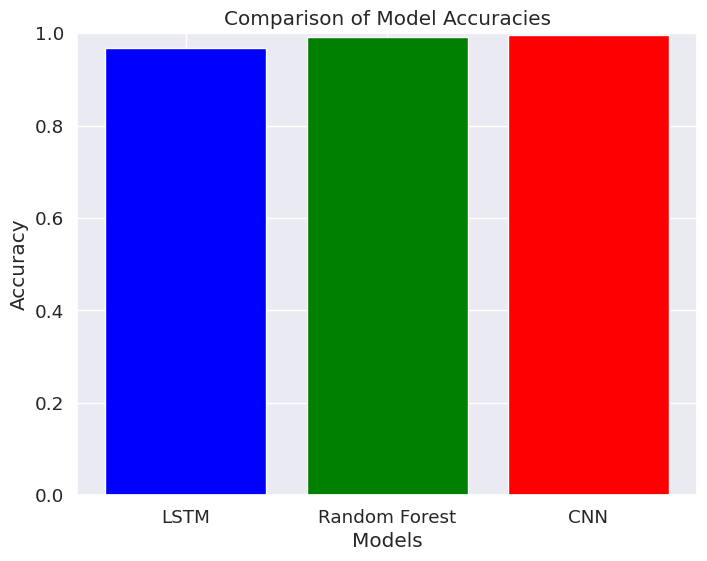

In [ ]:
import matplotlib.pyplot as plt

lstm_accuracy = average_acc
rf_accuracy = accuracy
cnn_accuracy = test_accuracy

print(lstm_accuracy)
print(rf_accuracy)
print(cnn_accuracy)
models = ['LSTM', 'Random Forest', 'CNN']
accuracies = [lstm_accuracy, rf_accuracy, cnn_accuracy]


plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


Testing of LSTM


In [ ]:
import numpy as np
import librosa
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    audio_path = fn
audio, sr = librosa.load(audio_path, sr=None)

def extract_mfcc(audio):
    mfcc = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=60).T, axis=0)
    return mfcc

mfcc_features = extract_mfcc(audio)
X_test = np.expand_dims(mfcc_features, axis=0)
X_test = np.expand_dims(X_test, axis=-1)

predictions = model.predict(X_test)
predicted_class = np.argmax(predictions)

class_labels = enc.categories_[0]
predicted_label = class_labels[predicted_class]

print("Predicted class:", predicted_label)


Saving YAF_burn_happy.wav to YAF_burn_happy.wav
1/1 [==============================] - 0s 24ms/step
Predicted class: happy


Testing of RFC

In [ ]:
import numpy as np
import librosa
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    audio_path = fn

audio, sr = librosa.load(audio_path, sr=None)

def extract_mfcc(audio):
    mfcc = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=60).T, axis=0)
    return mfcc

mfcc_features = extract_mfcc(audio)
mfcc_features_flattened = mfcc_features.reshape(1, -1)
predicted_class_rf = rf_model.predict(mfcc_features_flattened)[0]

print("Predicted class (Random Forest):",class_names[predicted_class_rf])


Saving YAF_chain_neutral.wav to YAF_chain_neutral.wav
Predicted class (Random Forest): neutral


Testing of CNN 1D

In [ ]:
import numpy as np
import librosa
from google.colab import files


uploaded = files.upload()

for fn in uploaded.keys():
    audio_path = fn

audio, sr = librosa.load(audio_path, sr=None)

def extract_mfcc(audio):
    mfcc = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=60).T, axis=0)
    return mfcc


mfcc_features = extract_mfcc(audio)
X_test = np.expand_dims(mfcc_features, axis=0)
X_test = np.expand_dims(X_test, axis=-1)

predictions = model.predict(X_test)

predicted_class = np.argmax(predictions)

class_labels = enc.categories_[0]
predicted_label = class_labels[predicted_class]

print("Predicted class (1D CNN):", predicted_label)


Saving YAF_goose_sad.wav to YAF_goose_sad (1).wav
1/1 [==============================] - 0s 23ms/step
Predicted class (1D CNN): sad
